In [1]:
import pandas as pd
import glob
import json

def getEXPTRES(dirpath):
    # Create an empty list to store the data.
    data = []

    # Loop through each file in the directory matching the JSON file extension.
    for file in glob.glob(dirpath):
        with open(file, 'r') as f:
            # Load the content of the file as JSON.
            content = json.load(f)
            # Loop through each record in the JSON file.
            for record in content:
                # Extract the desired fields and add them to the data list.
                data.append({
                    'subject_id': record.get('subject_id', None),
                    'score': record.get('score', None),
                    'veritas': record.get('veritas', None),
                    'lower_threshold': record.get('lower_threshold', None),
                    'veritas_prob': record.get('veritas_prob', None)
                })

    # Create a DataFrame from the collected data.
    return pd.DataFrame(data).set_index('subject_id')

def getEXPTRES_(dirpath,ids):
    # Create an empty list to store the data.
    data = []

    # Loop through each file in the directory matching the JSON file extension.
    for file in glob.glob(dirpath):
        with open(file, 'r') as f:
            # Load the content of the file as JSON.
            content = json.load(f)
            # Loop through each record in the JSON file.
            for record in content:
                # Extract the desired fields and add them to the data list.
                if record.get('subject_id', None) in ids:
                    data.append({
                        'subject_id': record.get('subject_id', None),
                        'responses': record.get('responses', None),
                        'score': record.get('score', None),
                        'veritas': record.get('veritas', None),
                        'lower_threshold': record.get('lower_threshold', None),
                        'veritas_prob': record.get('veritas_prob', None)
                    })
                
                    

    # Create a DataFrame from the collected data.
    return pd.DataFrame(data).set_index('subject_id')
        

In [2]:
dirpath='../veritas-experiment/*json'

In [3]:
df=getEXPTRES(dirpath)

In [20]:
df['lower']=df.lower_threshold < 1

/home/ishanu/.local/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='veritas', ylabel='Density'>

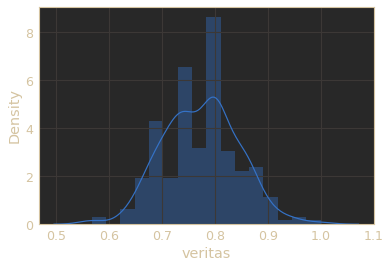

In [5]:
import seaborn as sns
from jupyterthemes import jtplot
jtplot.style()
sns.distplot(df.veritas)

/home/ishanu/.local/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='lower_threshold', ylabel='Density'>

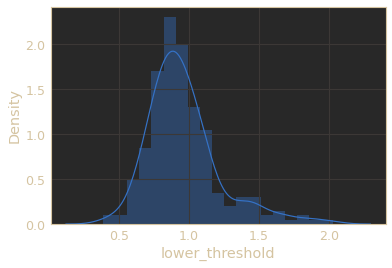

In [6]:
sns.distplot(df.lower_threshold)

/home/ishanu/.local/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='score', ylabel='Density'>

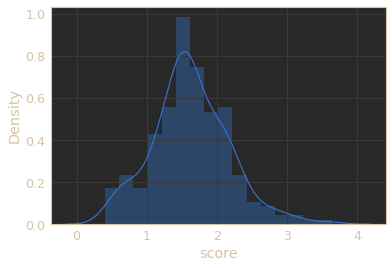

In [7]:
sns.distplot(df.score)

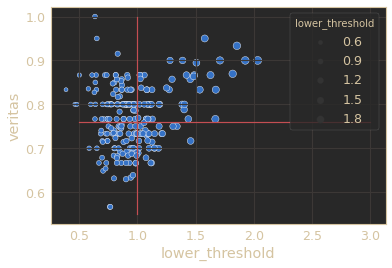

In [18]:
ax=sns.scatterplot(data=df,x='lower_threshold',y='veritas',size='lower_threshold')
ax.plot([1,1],[0.55,1],'-r')
ax.plot([.5,3],[0.76,.76],'-r')


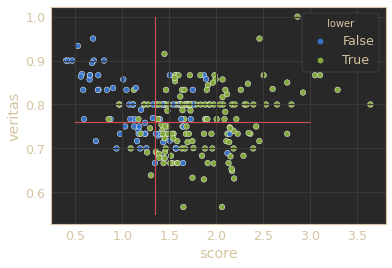

In [21]:
ax=sns.scatterplot(data=df,x='score',y='veritas',hue='lower')
ax.plot([1.35,1.35],[0.55,1],'-r')
ax.plot([.5,3],[0.76,.76],'-r')

In [23]:
def malingerFlag(row):
    C0=.9
    C1=.759
    C2=1.35
    if (row.veritas > C1) and (row.score > C2):
        return 0
    if (row.lower_threshold < C0) and (row.score > C2):
        return 0    
    if (row.score > C2):
        return 1
    return -1



In [24]:
df['mg']=df.apply(malingerFlag,axis=1)
df[df.mg==1].index.size/df.index.size

0.15584415584415584

In [25]:
df

,score,veritas,lower_threshold,veritas_prob,mg,lower
subject_id,,,,,,
prolificuserkkoamwaa8x,2.086982,0.766667,0.740192,0.975565,0,True
prolificuserjdxu06o70li_UK,1.175450,0.733333,1.147581,0.925737,-1,False
prolificuseruu9wkw1ue2,2.361640,0.733333,0.786850,0.925737,0,True
prolificuserekzewvrhyfn_UK,1.957559,0.700000,0.936673,0.757700,1,True
prolificuserznbqrjgxnyd,0.653970,0.857143,1.453932,0.997380,-1,False
...,...,...,...,...,...,...
prolificusermyugdsqgbq,0.856659,0.766667,0.933389,0.975565,-1,True
prolificuservfpw5mtor4f_UK,2.106645,0.716667,0.698563,0.864912,0,True
prolificuser8dt970xc68b,1.757962,0.700588,0.965689,0.762442,1,True


In [37]:
df.index.size-df[df.mg==1].index.size

217

In [12]:
df_US = df[~df.index.str.endswith('_US')]

In [13]:
df_UK = df[~df.index.str.endswith('_UK')]

In [14]:
df.mg.value_counts()

 0    135
-1     60
 1     36
Name: mg, dtype: int64

In [45]:
df[df.mg==1].index.size

14

In [43]:
ratio = df[df.mg==1].index.size/df.index.size
ratio

0.06060606060606061

In [44]:
ratio = df_UK[df_UK.mg==1].index.size/df_UK.index.size
ratio

0.14166666666666666

In [42]:
ratio = df_US[df_US.mg==1].index.size/df_US.index.size
ratio

0.15584415584415584

/home/ishanu/.local/lib/python3.10/site-packages/seaborn/_core.py:1057: FutureWarning: reindexing with a non-unique Index is deprecated and will raise in a future version.
  comp_col.loc[orig.index] = pd.to_numeric(axis.convert_units(orig))


ValueError: cannot reindex on an axis with duplicate labels

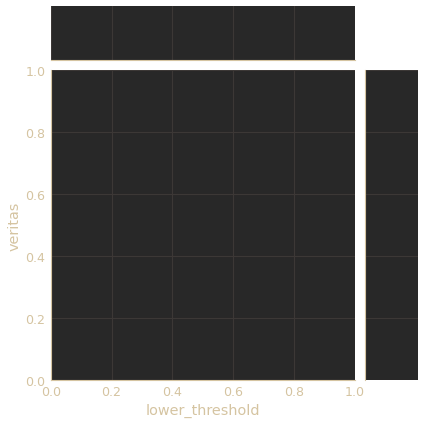

In [18]:
sns.jointplot(data=df_UK,x='lower_threshold',y='veritas',kind='kde')

In [75]:
df[df.mg==1].index.size

14

In [76]:
mf=df[df.mg==1]

In [85]:
mf_=getEXPTRES_(dirpath,mf.index.values.astype(str))

/home/ishanu/.local/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='veritas_prob', ylabel='Density'>

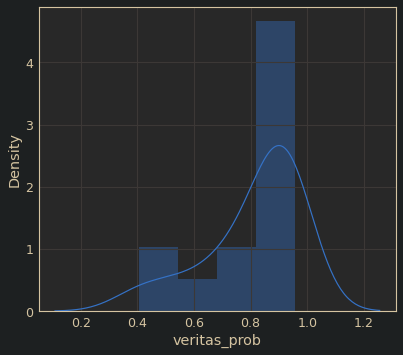

In [87]:
sns.distplot(mf_.veritas_prob)

In [91]:
mf_.loc['prolificusermhp0mw0er3m']

responses          {'ptsd179': '4', 'ptsd40': '4', 'ptsd31': '5',...
score                                                       1.646387
veritas                                                     0.666667
lower_threshold                                             1.115846
veritas_prob                                                0.406923
Name: prolificusermhp0mw0er3m, dtype: object

In [54]:
af=getEXPTRES_(dirpath,df.index.values.astype(str))

In [56]:
def getJson(row):
    return {row.name:row.responses}

In [60]:
eson=list(af.apply(getJson,axis=1).values)

In [62]:
import sys
sys.path.append("/home/ishanu/ZED/Research/truthnet/veritas_test/") 
from infer_veritas import  *
from truthfinder import *
import gzip
import seaborn as sns

In [123]:
rff2=reveal(eson,"/home/ishanu/ZED/Research/truthnet/veritas_test/veritas_models/veritas_004.pkl.gz")

ckeck passed


In [124]:
RFF2=pd.DataFrame([(x['subject_id'],x['lower_threshold'],x['veritas'],x['score']) for x in rff2[0]],
                 columns=['sub','lower_threshold','veritas','score']).set_index('sub')

<AxesSubplot:xlabel='score', ylabel='veritas'>

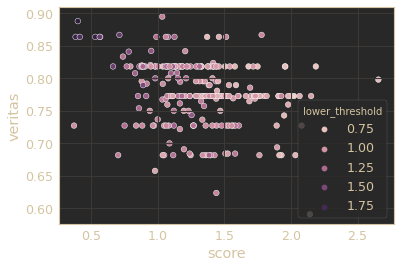

In [125]:
sns.scatterplot(data=RFF2,x='score',y='veritas',hue='lower_threshold')

<AxesSubplot:xlabel='lower_threshold', ylabel='Density'>

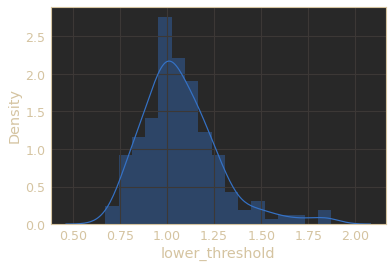

In [126]:
sns.distplot(RFF2.lower_threshold)

In [127]:
RFF2['mg']=RFF2.apply(malingerFlag,axis=1)
RFF2[RFF2.mg==1].index.size/RFF2.index.size

0.06493506493506493

In [115]:
4/0.05194805194805195

77.0

In [83]:
RFF=pd.DataFrame([(x['subject_id'],x['lower_threshold'],x['veritas'],x['score']) for x in rff[0]],
                 columns=['sub','lower_threshold','veritas','score']).set_index('sub')

<AxesSubplot:xlabel='score', ylabel='veritas'>

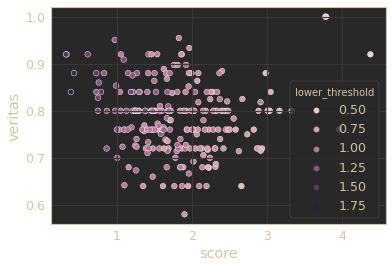

In [84]:
sns.scatterplot(data=RFF,x='score',y='veritas',hue='lower_threshold')

<AxesSubplot:xlabel='lower_threshold', ylabel='Density'>

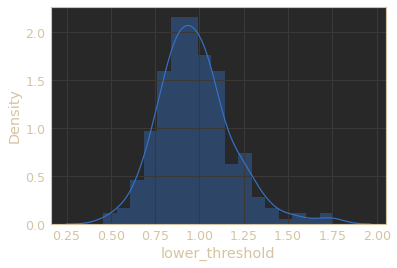

In [85]:
sns.distplot(RFF.lower_threshold)

<AxesSubplot:xlabel='veritas', ylabel='Density'>

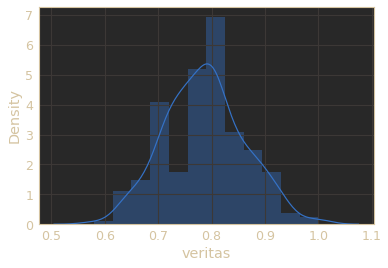

In [86]:
sns.distplot(RFF.veritas)

In [94]:
RFF['mg']=RFF.apply(malingerFlag,axis=1)
RFF[RFF.mg==1].index.size/RFF.index.size

0.05194805194805195

In [95]:
RFF[RFF.mg==1]

,lower_threshold,veritas,score,mg
sub,,,,
prolificuser9fnptex4yrc,1.199871,0.750903,1.582172,1
prolificuserf0wffkpm2ih_UK,1.023625,0.714286,1.794843,1
60c71db92651d246c6081107ejnsl7lx1gq_UK,1.044423,0.733333,1.413876,1
prolificuserwfma5boo7b_UK,1.070137,0.715000,1.672725,1
prolificuserxargfwk4z4r,1.100236,0.720000,1.815906,1
prolificuserns5m31kjzwg_UK,1.087592,0.720000,1.905634,1
prolificuser5w3s4ia44b_UK,1.088059,0.720000,1.418645,1
prolificuser7ajigtllpml,1.011328,0.680000,1.846352,1
prolificusergwybcn66hqc_UK,1.030469,0.666667,1.955821,1


In [28]:
FILES=glob.glob(dirpath)

In [29]:
a=[a[0] for a in ]

['../veritas-experiment/predictions_b661943c-e859-4d1e-8aad-b12834224719.json',
 '../veritas-experiment/predictions_5b1e36e0-45c1-42fb-af4a-dc9c3cd818e0.json',
 '../veritas-experiment/predictions_c7776ac9-033d-4813-b8c5-9373670c97c1.json',
 '../veritas-experiment/predictions_cf36b70c-3f3f-434d-9f30-11621b60cb22.json',
 '../veritas-experiment/predictions_38a27c05-43f4-4693-8d16-0f43057668a0.json',
 '../veritas-experiment/predictions_3fbb67eb-c3ad-4cb6-baf9-6c4dab43ffb9.json',
 '../veritas-experiment/predictions_9cabcd7a-8662-431f-b65c-09b2a1003cba.json',
 '../veritas-experiment/predictions_05aec39d-59a1-49af-99df-245d526e4775.json',
 '../veritas-experiment/predictions_bc0be2b9-6f6c-495e-bf4e-b99e2402664d.json',
 '../veritas-experiment/predictions_821c1c40-acbb-473e-9f8b-42e873791f20.json',
 '../veritas-experiment/predictions_664f3f72-3d38-4ab9-a357-2d398abcb7f8.json',
 '../veritas-experiment/predictions_ef691133-6ede-43df-8274-3e45638a2e5f.json',
 '../veritas-experiment/predictions_dc50

In [39]:
A=[]
import numpy as np
for f in FILES:
    with open(f, 'r') as file:
        content = json.load(file)
    H={}
    H[content[0]['subject_id']]=content[0]['responses']
    A=np.append(A,H)

In [40]:
list(A)

[{'prolificuserkkoamwaa8x': {'ptsd29': '5',
   'ptsd14': '5',
   'ptsd58': '5',
   'ptsd170': '3',
   'ptsd71': '4',
   'ptsd171': '5',
   'ptsd172': '3',
   'ptsd60': '4',
   'ptsd72': '5',
   'ptsd13': '5',
   'ptsd173': '5',
   'ptsd74': '5',
   'ptsd179': '5',
   'ptsd16': '4',
   'ptsd83': '3',
   'ptsd40': '5',
   'ptsd78': '4',
   'ptsd90': '5',
   'ptsd48': '4',
   'ptsd31': '5'}},
 {'prolificuserjdxu06o70li_UK': {'ptsd31': '4',
   'ptsd13': '4',
   'ptsd131': '5',
   'ptsd179': '4',
   'ptsd90': '3',
   'ptsd102': '3',
   'ptsd136': '3',
   'ptsd137': '4',
   'ptsd40': '5',
   'ptsd14': '3',
   'ptsd98': '2',
   'ptsd16': '3',
   'ptsd145': '4',
   'ptsd48': '3',
   'ptsd133': '3',
   'ptsd171': '4',
   'ptsd139': '3',
   'ptsd60': '2',
   'ptsd142': '3',
   'ptsd78': '2'}},
 {'prolificuseruu9wkw1ue2': {'ptsd50': '5',
   'ptsd170': '4',
   'ptsd29': '5',
   'ptsd72': '4',
   'ptsd131': '5',
   'ptsd90': '5',
   'ptsd60': '5',
   'ptsd16': '4',
   'ptsd173': '5',
   'ptsd159': 

In [41]:
import gzip
import dill as pickle
with gzip.open('experiment.pkl.gz', 'wb') as file:
    pickle.dump(list(A), file)